In [1]:
import os
import time

import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import (FixedLocator, MultipleLocator, FormatStrFormatter, LinearLocator)
from matplotlib.dates import MONDAY
from matplotlib.dates import MonthLocator, WeekdayLocator, DayLocator, DateFormatter
from matplotlib import gridspec
import datetime

%matplotlib inline

print("Package is ready.")

Package is ready.


In [2]:
plt.rcParams['figure.figsize'] = ((8/2.54)*2, (6/2.54)*2)
plt.rcParams["font.family"] = "arial"
plt.rcParams["font.serif"] = "arial"
plt.rcParams["mathtext.default"] = "rm"
plt.rcParams.update({'font.size': 11})
MARKER_SIZE = 15
cmap_m = ["#f4a6ad", "#f6957e", "#fccfa2", "#8de7be", "#86d6f2", "#24a9e4", "#b586e0", "#d7f293"]
cmap = ["#e94d5b", "#ef4d28", "#f9a54f", "#25b575", "#1bb1e7", "#1477a2", "#a662e5", "#c2f442"]

plt.rcParams['axes.linewidth'] = 2
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['ytick.minor.width'] = 1

In [3]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

# Figure 2

### greenhouse environment

In [4]:
climate_df = pd.read_excel("./data/climate.xlsx", index_col="date")
climate_df.index = pd.DatetimeIndex(climate_df.index)

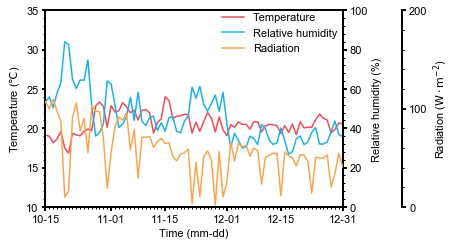

In [6]:
x_date = climate_df.index

fig = plt.figure(figsize=((8.5/2.54)*2, (6/2.54)*1.5))
ax0 = plt.subplot()
line_temp, = ax0.plot(x_date, climate_df[["temp"]], "-", c=cmap[0], label = "Temperature")

ax0.set_ylabel("Temperature ($℃$)")
ax0.set_ybound([10, 35])
ax0.yaxis.set_major_locator(MultipleLocator(5))
ax0.yaxis.set_minor_locator(MultipleLocator(1))

hum = ax0.twinx()
line_hum, = hum.plot(x_date, climate_df[["rh"]], "-", c=cmap[4], label = "Relative humidity")
hum.set_ylabel("Relative humidity (%)")
hum.set_ybound([0, 100])
hum.yaxis.set_major_locator(MultipleLocator(20))
hum.yaxis.set_minor_locator(MultipleLocator(4))

rad = ax0.twinx()
line_rad, = rad.plot(x_date, climate_df[["rad"]], "-", c=cmap[2], label = "Radiation")
rad.set_ylabel("Radiation ($W \cdot m^{-2}$)")
rad.yaxis.set_major_locator(MultipleLocator(100))
rad.yaxis.set_minor_locator(MultipleLocator(20))
rad.spines["right"].set_position(("axes", 1.2))
make_patch_spines_invisible(rad)
rad.spines["right"].set_visible(True)

fig.legend(handles=[line_temp, line_hum, line_rad], 
           labels = ["Temperature", "Relative humidity", "Radiation"],
           frameon=False, bbox_to_anchor=(0.72, 0.95))
plt.axis([pd.Timestamp("2014-10-15"), pd.Timestamp("2014-12-31"), 0, 200])

ax0.set_xlabel("Time (mm-dd)")

# months = MonthLocator(range(1, 13), bymonthday=3, interval=1)
# rad.xaxis.set_major_locator(months)
# rad.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# mondays = WeekdayLocator(MONDAY)
# ax.xaxis.set_minor_locator(mondays)



rad.xaxis.set_major_locator(DayLocator(bymonthday=(1, 15)))
rad.xaxis.set_minor_locator(MultipleLocator(1))
rad.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

locs = list(rad.get_xticks())+ [mdates.date2num(datetime.datetime(2014,12,31))]
locator= FixedLocator(locs)
rad.xaxis.set_major_locator(locator)

fig.tight_layout()

fig.savefig("./figures/Fig02.png", dpi=600, transparent=True, format="png")
plt.show()

In [ ]:
onetoone_df = pd.read_excel("./data/onetoone.xlsx")

In [ ]:
r2_train = r2_score(onetoone_df.iloc[:,0], onetoone_df.iloc[:,1])
rmse_train = np.sqrt(mean_squared_error(onetoone_df.iloc[:,0], onetoone_df.iloc[:,1]))

print(r2_train)
print(rmse_train)

In [ ]:
min_ = onetoone_df.iloc[:,1].min()
max_ = onetoone_df.iloc[:,1].max()
x_ = np.arange(onetoone_df.iloc[:,1].min() - 1500, onetoone_df.iloc[:,1].max() + 1500).reshape(-1,1)

X = onetoone_df.iloc[:,0].values.reshape(-1,1)
Y = onetoone_df.iloc[:,1].values.reshape(-1,1)

regr = linear_model.LinearRegression()
regr.fit(X, Y)
Yp = regr.predict(X)
reg_x = x_
reg_y = reg_x*regr.coef_ + regr.intercept_

fig = plt.figure(figsize = ((8/2.54), (6/2.54)))
ax = plt.subplot()
x_linear = x_
y_linear = x_linear

reg_line = ax.plot(reg_x, reg_y, "k-", label = "regression line", zorder=7)
linear = ax.plot(x_linear, y_linear, "k--", label = "1:1 line", zorder=5)
scatter = ax.scatter(onetoone_df.iloc[:,0], onetoone_df.iloc[:,1], edgecolor='black', linewidth=0.25, 
                     s=MARKER_SIZE/1.5, c="white", label = "$CO_2$ concentration", zorder=10)
if regr.intercept_ < 0:
    ax.text(0.6, 0.67, '$\it{y = %.2fx%.2f}$' % (regr.coef_, regr.intercept_),
            verticalalignment='bottom', horizontalalignment='right', transform=ax.transAxes)
else:
    ax.text(0.6, 0.67, '$\it{y = %.2fx+%.2f}$' % (regr.coef_, regr.intercept_),
    verticalalignment='bottom', horizontalalignment='right', transform=ax.transAxes)
ax.text(0.95, 0.1, '$R^{2} = %.2f$\n$RMSE = %.2f$' % (r2_train, rmse_train),
            verticalalignment='bottom', horizontalalignment='right', transform=ax.transAxes)
#ax.legend(handles = [scatter], frameon = False)
# plt.xlabel("Measured $CO_2$ ($\mu mol \cdot mol^{-1}$)")
# plt.ylabel("Estimated $CO_2$ ($\mu mol \cdot mol^{-1}$)")
ax.yaxis.set_major_locator(MultipleLocator(0.4))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.xaxis.set_major_locator(MultipleLocator(0.4))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))

ax.xaxis.set_major_locator(MultipleLocator(0.4))
ax.xaxis.set_minor_locator(plt.)

plt.axis([3.2, 5.2]*2)
fig.tight_layout()
fig.savefig("./figures/Fig5a.png", dpi=600, transparent=True, format="png")
plt.show()

In [ ]:
r2_test = r2_score(onetoone_df.iloc[:,2].dropna(), onetoone_df.iloc[:,3].dropna())
rmse_test = np.sqrt(mean_squared_error(onetoone_df.iloc[:,2].dropna(), onetoone_df.iloc[:,3].dropna()))

print(r2_test)
print(rmse_test)

In [ ]:
min_ = onetoone_df.iloc[:,3].min()
max_ = onetoone_df.iloc[:,3].max()
x_ = np.arange(onetoone_df.iloc[:,1].min() - 1500, onetoone_df.iloc[:,3].max() + 1500).reshape(-1,1)

X = onetoone_df.iloc[:,2].dropna().values.reshape(-1,1)
Y = onetoone_df.iloc[:,3].dropna().values.reshape(-1,1)

regr = linear_model.LinearRegression()
regr.fit(X, Y)
Yp = regr.predict(X)
reg_x = x_
reg_y = reg_x*regr.coef_ + regr.intercept_

fig = plt.figure(figsize = ((8/2.54), (6/2.54)))
ax = plt.subplot()
x_linear = x_
y_linear = x_linear

reg_line = ax.plot(reg_x, reg_y, "k-", label = "regression line", zorder=7)
linear = ax.plot(x_linear, y_linear, "k--", label = "1:1 line", zorder=5)
scatter = ax.scatter(onetoone_df.iloc[:,2], onetoone_df.iloc[:,3], edgecolor='black', linewidth=0.25, 
                     s=MARKER_SIZE/1.5, c="white", label = "$CO_2$ concentration", zorder=10)
if regr.intercept_ < 0:
    ax.text(0.6, 0.67, '$\it{y = %.2fx%.2f}$' % (regr.coef_, regr.intercept_),
            verticalalignment='bottom', horizontalalignment='right', transform=ax.transAxes)
else:
    ax.text(0.6, 0.67, '$\it{y = %.2fx+%.2f}$' % (regr.coef_, regr.intercept_),
    verticalalignment='bottom', horizontalalignment='right', transform=ax.transAxes)
ax.text(0.95, 0.1, '$R^{2} = %.2f$\n$RMSE = %.2f$' % (0.7222, rmse_test),
            verticalalignment='bottom', horizontalalignment='right', transform=ax.transAxes)
#ax.legend(handles = [scatter], frameon = False)
# plt.xlabel("Measured $CO_2$ ($\mu mol \cdot mol^{-1}$)")
# plt.ylabel("Estimated $CO_2$ ($\mu mol \cdot mol^{-1}$)")
ax.yaxis.set_major_locator(MultipleLocator(0.2))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.xaxis.set_major_locator(MultipleLocator(0.2))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))

plt.axis([4.2, 5.2]*2)

fig.tight_layout()
fig.savefig("./figures/Fig5b.png", dpi=600, transparent=True, format="png")
plt.show()

In [ ]:
hour_df = pd.read_excel("./data/hourlength.xlsx")

In [ ]:
fig = plt.figure(figsize=((8.5/2.54)*1, (6/2.54)*1))
ax = plt.subplot()

timestep_bar = ax.bar(hour_df.iloc[:,0], hour_df.iloc[:,1], 4, color='k')
ax.xaxis.set_major_locator(MultipleLocator(6))
ax.yaxis.set_major_locator(MultipleLocator(0.2))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.set_ybound([0, 1.0])
plt.xlabel("Time step (hour)")
plt.ylabel("Test accuracy ($R^{2}$)")

fig.tight_layout()
fig.savefig("./figures/Fig06a.png", dpi=600, transparent=True, format="png")
plt.show()

In [ ]:
fig = plt.figure(figsize=((8.5/2.54)*1, (6/2.54)*1))
ax = plt.subplot()

timestep_bar = ax.bar(hour_df.iloc[:,2], hour_df.iloc[:,3], 0.8, color='k')
ax.xaxis.set_major_locator(MultipleLocator(2))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(0.2))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.set_ybound([0, 1.0])
plt.xlabel("Output length (hour)")
plt.ylabel("Test accuracy ($R^{2}$)")

fig.tight_layout()
fig.savefig("./figures/Fig06b.png", dpi=600, transparent=True, format="png")
plt.show()

In [ ]:
ECresults_df = pd.read_excel("./data/ECresults.xlsx", index_col="hour")

In [ ]:
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=((8.5/2.54)*2, (6/2.54)*2))

x_index = ECresults_df.index

origin = plt.subplot(gs[0,0])
meas_1, = origin.plot(x_index, ECresults_df.iloc[:,0], "ko"
                      , markersize=MARKER_SIZE/4)
pred_1, = origin.plot(x_index, ECresults_df.iloc[:,1], "k-")

# origin.set_ylabel("Height ($cm$)")
# origin.set_ybound([140, 220])
# origin.yaxis.set_major_locator(MultipleLocator(20))
# origin.yaxis.set_minor_locator(MultipleLocator(4))

origin.legend(handles=[meas_1, pred_1],
           labels = ["Measured", "Predicted"],
           frameon=False, loc=0)
plt.setp(origin.get_xticklabels(), visible=False)
origin.tick_params(bottom=False, top=False, labelbottom=False)



origin1 = plt.subplot(gs[1,0])
meas_2 = origin1.plot(x_index, ECresults_df.iloc[:,3], "ko"
                      , markersize=MARKER_SIZE/4)
pred_2 = origin1.plot(x_index, ECresults_df.iloc[:,2], "k-")


origin1.tick_params(top=False)


origin2 = plt.subplot(gs[0,1])
meas_3 = origin2.plot(x_index, ECresults_df.iloc[:,4], "ko"
                      , markersize=MARKER_SIZE/4)
pred_3 = origin2.plot(x_index, ECresults_df.iloc[:,5], "k-")

plt.setp(origin2.get_yticklabels(), visible=False)
origin2.tick_params(left=False, bottom=False, top=False, labelbottom=False)

origin3 = plt.subplot(gs[1,1])
meas_4 = origin3.plot(x_index, ECresults_df.iloc[:,6], "ko"
                      , markersize=MARKER_SIZE/4)
pred_4 = origin3.plot(x_index, ECresults_df.iloc[:,7], "k-")

plt.setp(origin3.get_yticklabels(), visible=False)
origin3.tick_params(left=False, top=False)

origin1.xaxis.set_major_locator(MultipleLocator(2))
origin1.xaxis.set_minor_locator(MultipleLocator(1))
origin3.xaxis.set_major_locator(MultipleLocator(2))
origin3.xaxis.set_minor_locator(MultipleLocator(1))

origin.yaxis.set_major_locator(MultipleLocator(0.2))
origin.yaxis.set_minor_locator(MultipleLocator(0.1))
origin1.yaxis.set_major_locator(MultipleLocator(0.2))
origin1.yaxis.set_minor_locator(MultipleLocator(0.1))


origin.set_xbound([0,25])
origin1.set_xbound([0,25])
origin2.set_xbound([0,25])
origin3.set_xbound([0,25])

origin.set_ybound([3.9, 5.4])
origin1.set_ybound([3.9, 5.4])
origin2.set_ybound([3.9, 5.4])
origin3.set_ybound([3.9, 5.4])

fig.tight_layout()
plt.subplots_adjust(hspace=.0, wspace=.0)
fig.savefig("./figures/Fig04.png", dpi=600, transparent=True, format="png")
plt.show()

In [ ]:
RMSEs = pd.read_excel("./data/RMSE.xlsx", index_col="hour")
x_index_ = np.arange(0,26)
train_mean = [0.0820]*len(x_index_)
test_mean = [0.0741]*len(x_index_)

In [ ]:
fig = plt.figure(figsize = ((8/2.54*1.2), (6/2.54*1.2)))
ax = plt.subplot()

x_index = RMSEs.index

test_mean_line, = ax.plot(x_index_, test_mean, "k--")
train_mean_line, = ax.plot(x_index_, train_mean, "k-")
each_dot, = ax.plot(x_index, RMSEs, "ko-", markersize=MARKER_SIZE/4)

ax.set_ybound([0.02, 0.14])
ax.set_xbound([0, 25])

ax.xaxis.set_major_locator(MultipleLocator(2))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(0.02))
ax.yaxis.set_minor_locator(MultipleLocator(0.01))

ax.set_xlabel("Time (hour)")
ax.set_ylabel("RMSE")

ax.legend(handles=[test_mean_line, train_mean_line, each_dot],
         labels=["Test average", "Validation average", "Each prediction"],
         frameon=False, loc=2)

fig.tight_layout()
fig.savefig("./figures/Fig08.png", dpi=600, transparent=True, format="png")
plt.show()